In [1]:
%env CUDA_LAUNCH_BLOCKING=0
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_LAUNCH_BLOCKING=0
env: CUDA_VISIBLE_DEVICES=1


In [2]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image
from random import shuffle
import pandas as pd
import pickle

import glob
from itertools import chain
import os
import random
import zipfile
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import csv

%matplotlib inline

In [3]:
DATA_DIR = '/home/HDD12TB/datasets/images/lagenda/'
INPUT_SIZE = (224, 224)
#INPUT_SIZE = (112, 112)
#INPUT_SIZE = (299, 299)

---

# Data preprocessing

In [4]:
LAG_IMG_DIR_ORIG=DATA_DIR+'lag_benchmark/'
LAG_FILE_ORIG=DATA_DIR+'lagenda_annotation.csv'

LAG_FACES_DIR=DATA_DIR+'lag_faces/'
LAG_FACES_FILE=DATA_DIR+'lagenda_faces_annotation.csv'

Index(['img_name', 'age', 'gender', 'face_x0', 'face_y0', 'face_x1', 'face_y1',
       'person_x0', 'person_y0', 'person_x1', 'person_y1'],
      dtype='object')
lag_benchmark/fbdead3926ba65c4.jpg 10 F 342 583 420 663
lag_benchmark/0e36bcb471da5293.jpg 13 M 976 327 1100 413
lag_benchmark/0e36bcb471da5293.jpg -1 -1 1006 328 1102 480
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg -1 -1 -1 -1 -1 -1
lag_benchmark/46469833c3162cb9.jpg 15 F 947 290 999 354
lag_benchmark/46469833c3162cb9.jpg -1 -1 470 316 498 356
lag_benchmark/24bfb4843

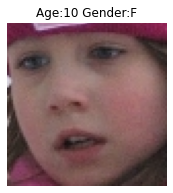

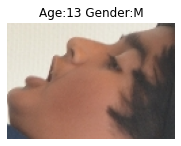

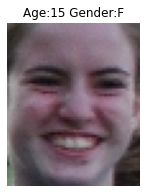

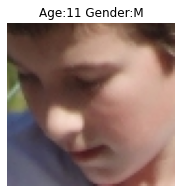

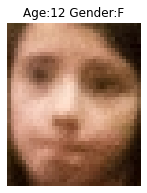

In [5]:
lag_df = pd.read_csv(LAG_FILE_ORIG)
print(lag_df.columns)

ind=0
for i,d in lag_df.iterrows():
    print(d.img_name,d.age,d.gender,d.face_x0,d.face_y0,d.face_x1,d.face_y1)
    if d.age==-1 and d.gender=='-1':
        continue
    ind+=1
    
    plt.figure(figsize=(3, 3))
    img=cv2.imread(os.path.join(DATA_DIR,d.img_name))
    img=img[d.face_y0:d.face_y1,d.face_x0:d.face_x1]
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    descr='Age:%.d Gender:%s'%(d.age, d.gender)
    plt.title(descr)
    plt.axis("off")

    if ind>=5:
        break
plt.show()

In [35]:
lag_df = pd.read_csv(LAG_FILE_ORIG)
lag_vals=[d for i,d in lag_df.iterrows()]
if not os.path.exists(LAG_FACES_DIR):
    os.makedirs(LAG_FACES_DIR)

with open(os.path.join(LAG_FACES_FILE), 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['filepath','age','gender'])
    writer.writeheader()
    for d in tqdm.tqdm(lag_vals):
        #print(d.img_name,d.age,d.gender,d.face_x0,d.face_y0,d.face_x1,d.face_y1)
        if d.age==-1 and d.gender=='-1':
            continue
        if d.age==-1 or d.gender=='-1':
            print(d.img_name,d.age,d.gender,d.face_x0,d.face_y0,d.face_x1,d.face_y1)
        img=cv2.imread(os.path.join(DATA_DIR,d.img_name))
        img=img[d.face_y0:d.face_y1,d.face_x0:d.face_x1]
        descr='Age:%.d Gender:%s'%(d.age, d.gender)

        ind=0
        img_name='_'+os.path.basename(d.img_name)
        while True:
            ind+=1
            dst_file_path=os.path.join(LAG_FACES_DIR,str(ind)+img_name)
            if not os.path.exists(dst_file_path):
                break
        
        cv2.imwrite(dst_file_path,img)
        writer.writerow({'filepath':str(ind)+img_name,'age':d.age, 'gender':d.gender})


# Examine data

In [5]:
lag_faces_df= pd.read_csv(LAG_FACES_FILE)
lag_age=[d.age for i,d in lag_faces_df.iterrows()]
print(np.unique(lag_age, return_counts=True))

lag_gender=[d.gender for i,d in lag_faces_df.iterrows()]
print(np.unique(lag_gender, return_counts=True))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]), array([  51,  369, 1466,  232, 3237,  507, 3547,  756,  508,  478, 2194,
       1399,  625, 1070,  248, 1021,  340, 1251, 1567, 1146, 2260, 1876,
       1073,  276,  286, 1491,  282, 3362,  474,  251,  248, 2245,  225,
        459, 2531,  226,  830, 2014, 2353,  236, 2129, 2044,  996,  304,
        331,  946,  362, 2093, 2136,  381, 2079,  365,  402, 1106, 1995,
       1838,  389, 1493, 1724,  363, 1626, 1501, 1438,  306,  640, 1164,
       1075,  940,  908,  781,  728,  610,  580,  493,  462,  384,  364,
        281,  251,  203,  192,  160,  124,  122,  100,   71,

In [6]:
lag_faces_df.head()

,filepath,age,gender
0,1_fbdead3926ba65c4.jpg,10,F
1,1_0e36bcb471da5293.jpg,13,M
2,1_46469833c3162cb9.jpg,15,F
3,1_24bfb4843e3da057.jpg,11,M
4,1_2c83f33232089e7f.jpg,12,F


In [6]:
from sklearn.model_selection import train_test_split
lag_faces_df_train,lag_faces_df_val=train_test_split(lag_faces_df, test_size=0.1)
print(len(lag_faces_df_train),len(lag_faces_df_val))

75772 8420


In [8]:
lag_age_val=[d.age for i,d in lag_faces_df_val.iterrows()]
print(np.unique(lag_age_val, return_counts=True))

lag_gender_val=[d.gender for i,d in lag_faces_df_val.iterrows()]
print(np.unique(lag_gender_val, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 94, 95]), array([  8,  40, 126,  23, 323,  57, 357,  78,  53,  47, 217, 157,  67,
        94,  26,  94,  22, 143, 168, 111, 228, 177,  90,  29,  29, 166,
        34, 318,  41,  25,  19, 229,  19,  37, 298,  22,  74, 227, 255,
        18, 213, 212,  91,  32,  24, 102,  51, 230, 225,  44, 186,  40,
        37,  94, 177, 188,  42, 152, 159,  33, 163, 121, 131,  25,  55,
       128, 104, 105,  98,  83,  86,  64,  51,  33,  40,  39,  30,  37,
        23,  24,  17,  20,  13,  11,   6,   8,   9,   5,   6,   3,   1,
         1,   1,   1]))
(array(['F', 'M'], dtype='<U1'), array([4354, 4066]

In [9]:
lag_age_train=[d.age for i,d in lag_faces_df_train.iterrows()]
print(len(np.unique(lag_age_train)),np.unique(lag_age_train, return_counts=True))

95 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94]), array([  43,  329, 1340,  209, 2914,  450, 3190,  678,  455,  431, 1977,
       1242,  558,  976,  222,  927,  318, 1108, 1399, 1035, 2032, 1699,
        983,  247,  257, 1325,  248, 3044,  433,  226,  229, 2016,  206,
        422, 2233,  204,  756, 1787, 2098,  218, 1916, 1832,  905,  272,
        307,  844,  311, 1863, 1911,  337, 1893,  325,  365, 1012, 1818,
       1650,  347, 1341, 1565,  330, 1463, 1380, 1307,  281,  585, 1036,
        971,  835,  810,  698,  642,  546,  529,  460,  422,  345,  334,
        244,  228,  179,  175,  140,  111,  111,   94,   63, 

# Train

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms


print(f"Torch: {torch.__version__}")

Torch: 2.0.1+cu118


In [4]:
batch_size = 64 #48# 32# 32 #16 #8 #
epochs = 40
lr = 3e-5
gamma = 0.7
seed = 42
device = 'cuda'
use_cuda = torch.cuda.is_available()
print(use_cuda)

True


In [6]:
MY_TORCH_MODEL=True
MODEL_TYPE_ENET=1
MODEL_TYPE_REXNET=2
MODEL_TYPE_RESNET=3
MODEL_TYPE=MODEL_TYPE_RESNET #MODEL_TYPE_ENET #MODEL_TYPE_REXNET


IMG_SIZE_ORIG=256
IMG_SIZE=224 #112 #260# 256 #240 #300 # 80 #
if True:
    train_transforms = transforms.Compose(
        [
            #transforms.Resize((IMG_SIZE_ORIG,IMG_SIZE_ORIG)),
            #transforms.RandomResizedCrop(IMG_SIZE),
            transforms.Resize((IMG_SIZE,IMG_SIZE)),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
        ]
    )
elif True:
    img_orig_size=128
    train_transforms = transforms.Compose(
        [
            transforms.Resize((img_orig_size,img_orig_size)),
            transforms.RandomResizedCrop(IMG_SIZE),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
        ]
    )
else:
    train_transforms = transforms.Compose(
        [
            #transforms.Resize((IMG_SIZE_ORIG,IMG_SIZE_ORIG)),
            #transforms.RandomResizedCrop(IMG_SIZE),
            #transforms.RandomRotation(degrees=10),
            transforms.Resize((IMG_SIZE,IMG_SIZE)),
            transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
        ]
    )
test_transforms = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE,IMG_SIZE)),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)



In [39]:
class MultiTaskDataset(torch.utils.data.Dataset):
    def __init__(self,df, root, transform):
        self.paths = list(df.filepath)
        self.ages=df.age.to_numpy()
        self.females=(df.gender=='F').to_numpy().astype('int')
        self.transform = transform
        self.root=root

    def __len__(self): return len(self.paths)

    def __getitem__(self,idx):
        #dealing with the image
        img = Image.open(os.path.join(self.root,self.paths[idx])).convert('RGB')
        img = self.transform(img)

        age,is_female=self.ages[idx],self.females[idx]
        return img.data, (age,is_female)

kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}

batch_size=64 #96 #256 #128 #48
print(train_transforms)
train_dataset = MultiTaskDataset(df=lag_faces_df_train, root=LAG_FACES_DIR, transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_dataset = MultiTaskDataset(df=lag_faces_df_val,root=LAG_FACES_DIR, transform=test_transforms)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs) 

print(len(train_dataset), len(test_dataset))

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
75772 8420


In [38]:
(unique, counts) = np.unique(train_dataset.ages, return_counts=True)
cw=1/counts
cw/=cw.min()
class_weights = {i:cwi for i,cwi in zip(unique,cw)}
print(counts, class_weights.values())

num_classes=len(class_weights)
print(num_classes)

NameError: name 'train_dataset' is not defined

In [21]:
import timm
if True:
    model=timm.create_model('tf_efficientnet_b0', pretrained=False) #tf_efficientnet_b0_ns
    model.classifier=torch.nn.Identity()
    model.load_state_dict(torch.load('/home/HDD12TB/datasets/images/vggface2/state_vggface2_enet0_new.pt'))

if MY_TORCH_MODEL:
    if MODEL_TYPE==MODEL_TYPE_ENET:
        #model.classifier=nn.Sequential(nn.Linear(in_features=1280, out_features=num_classes+2)) #1792 #1280 #1536
        model.classifier=nn.Linear(in_features=1280, out_features=num_classes+2) #1792 #1280 #1536 #1408
    elif MODEL_TYPE==MODEL_TYPE_RESNET:
        model.fc=nn.Linear(in_features=512, out_features=num_classes+2)
    else:
        model.head.fc=nn.Linear(in_features=1920, out_features=num_classes+2)
else:
    model.fc=nn.Linear(in_features=2048, out_features=num_classes+2) #1792 #1280 #1536
#model.head.fc=nn.Linear(in_features=3072, out_features=num_classes+2)
#model.head=nn.Sequential(nn.Linear(in_features=768, out_features=num_classes+2))
model=model.to(device)
print(model)

EfficientNet(
  (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=

In [79]:
sys.path.append("/home/avsavchenko/src/distr/insightface/recognition/arcface_torch/backbones/")
import iresnet, mobilefacenet


In [104]:
if False:
    model = iresnet.iresnet50()
    model.load_state_dict(torch.load('/home/avsavchenko/src/distr/insightface/recognition/arcface_torch/work_dirs/affectnet_r50/model.pt')) #vggface2_r50
else:
    model = mobilefacenet.get_mbf(False, 512)
    model.load_state_dict(torch.load('/home/avsavchenko/src/distr/insightface/recognition/arcface_torch/work_dirs/vggface2_mbf/model.pt'))
    
print(model)

MobileFaceNet(
  (layers): ModuleList(
    (0): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=128)
      )
    )
    (1): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=128)
      )
    )
    (2): DepthWise(
      (layers): Sequential(
        (0): ConvBlock(
          (layers): Sequential(
            (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=128)
          )
        )
        (1): ConvBlock(
    

In [105]:
from collections import OrderedDict
model=nn.Sequential(OrderedDict([
    ('features', model),
    ('fc', nn.Linear(in_features=512, out_features=num_classes+2))
]))
#model.head.fc=nn.Linear(in_features=3072, out_features=num_classes)
#model.head=nn.Sequential(nn.Linear(in_features=768, out_features=num_classes))
model=model.to(device)
print(model)

Sequential(
  (features): MobileFaceNet(
    (layers): ModuleList(
      (0): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (1): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (2): DepthWise(
        (layers): Sequential(
          (0): ConvBlock(
            (layers): Sequential(
              (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): PReLU(

In [77]:
IMG_SIZE=112
train_transforms = transforms.Compose(
[
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
]
)
test_transforms = transforms.Compose(
[
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
]
)

In [ ]:
batch_size=128 #64 #256 #48
print(train_transforms)
train_dataset = MultiTaskDataset(df=lag_faces_df_train, root=LAG_FACES_DIR, transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_dataset = MultiTaskDataset(df=lag_faces_df_val,root=LAG_FACES_DIR, transform=test_transforms)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs) 

print(len(train_dataset), len(test_dataset))

In [14]:
class MultiTaskLossWrapper(nn.Module):
    def __init__(self):
        super(MultiTaskLossWrapper, self).__init__()
        weights = torch.FloatTensor(list(class_weights.values())).to(device)
        self.loss_ages = nn.CrossEntropyLoss(weight=weights)
        self.loss_genders = nn.CrossEntropyLoss()

    def forward(self, preds, target):
        loss_ages=self.loss_ages(preds[:,:num_classes],target[0])
        loss_genders=self.loss_genders(preds[:,num_classes:],target[1])
        return loss_ages+loss_genders#*0.5
my_criterion=MultiTaskLossWrapper()

In [48]:
import sys
sys.path.append('/home/avsavchenko/src/EmotiEffLib/training_and_examples/affectnet')
from robust_optimization import RobustOptimizer


In [16]:
import copy
def train(model,n_epochs=epochs, learningrate=lr, robust=False):
    # optimizer
    if robust:
        optimizer = RobustOptimizer(filter(lambda p: p.requires_grad, model.parameters()), optim.Adam, lr=learningrate)
        #print(optimizer)
    else:
        optimizer=optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learningrate)
    # scheduler
    #scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    best_epoch_val_loss=100
    best_epoch_val_gender_accuracy=0
    best_model=None
    for epoch in range(n_epochs):
        epoch_loss = 0
        epoch_age_accuracy = epoch_gender_accuracy = 0
        model.train()
        for data, label in tqdm(train_loader):
            data = data.to(device)
            label = [l.to(device) for l in label]
            
            output = model(data)
            loss = my_criterion(output, label)

            if use_sam:
                #optimizer.zero_grad()
                loss.backward()
                optimizer.first_step(zero_grad=True)
  
                # second forward-backward pass
                output = model(data)
                loss = my_criterion(output, label)
                loss.backward()
                optimizer.second_step(zero_grad=True)
            else:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            acc = (output[:,:num_classes].argmax(dim=1) == label[0]).float().mean()
            epoch_age_accuracy += acc / len(train_loader)
            
            acc = (output[:,num_classes:].argmax(dim=1) == label[1]).float().mean()
            epoch_gender_accuracy += acc / len(train_loader)
            
            epoch_loss += loss / len(train_loader)

        model.eval()
        with torch.no_grad():
            epoch_val_age_accuracy = epoch_val_gender_accuracy = 0
            epoch_val_loss = 0
            for data, label in test_loader:
                data = data.to(device)
                label = [l.to(device) for l in label]
                
                val_output = model(data)
                val_loss = my_criterion(val_output, label)

                acc = (val_output[:,:num_classes].argmax(dim=1) == label[0]).float().mean()
                epoch_val_age_accuracy += acc / len(test_loader)

                acc = (val_output[:,num_classes:].argmax(dim=1) == label[1]).float().mean()
                epoch_val_gender_accuracy += acc / len(test_loader)

                epoch_val_loss += val_loss / len(test_loader)

        print(
            f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - age_acc: {epoch_age_accuracy:.4f} - gender_acc: {epoch_gender_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_age_acc: {epoch_val_age_accuracy:.4f} - val_gender_acc: {epoch_val_gender_accuracy:.4f}\n"
        )
        #if best_epoch_val_loss>epoch_val_loss:
        #    best_epoch_val_loss=epoch_val_loss
        if best_epoch_val_gender_accuracy<epoch_val_gender_accuracy:
            best_epoch_val_gender_accuracy=epoch_val_gender_accuracy
            best_model=copy.deepcopy(model.state_dict())
        #scheduler.step()
    
    if best_model is not None:
        #model.load_state_dict(best_model)
        print(f"Best loss:{best_epoch_val_gender_accuracy}")
    else:
        print(f"No best model Best val metric:{best_epoch_val_gender_accuracy}")
    return best_model
        

In [52]:
#adapted from https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
def set_parameter_requires_grad(model, requires_grad):
    for param in model.parameters():
        param.requires_grad = requires_grad

In [19]:
set_parameter_requires_grad(model, requires_grad=False)
if False:
    set_parameter_requires_grad(model.features, requires_grad=True)
elif True:
    set_parameter_requires_grad(model.head.fc, requires_grad=True)
elif MY_TORCH_MODEL:
    print(MODEL_TYPE)
    if MODEL_TYPE==MODEL_TYPE_ENET:
        print('enet')
        set_parameter_requires_grad(model.classifier, requires_grad=True)
    elif MODEL_TYPE==MODEL_TYPE_RESNET:
        print('resnet')
        set_parameter_requires_grad(model.fc, requires_grad=True)
    else:
        set_parameter_requires_grad(model.head.fc, requires_grad=True)
else:
    print('hi')
    set_parameter_requires_grad(model.fc, requires_grad=True)
best_model_weights=train(model,10,0.001,use_sam=True)

  0%|          | 0/1184 [00:00<?, ?it/s]

Epoch : 1 - loss : 5.1373 - age_acc: 0.0283 - gender_acc: 0.6918 - val_loss : 4.8439 - val_age_acc: 0.0354 - val_gender_acc: 0.7290



  0%|          | 0/1184 [00:00<?, ?it/s]

Epoch : 2 - loss : 4.8116 - age_acc: 0.0367 - gender_acc: 0.6979 - val_loss : 4.9297 - val_age_acc: 0.0303 - val_gender_acc: 0.7382



  0%|          | 0/1184 [00:00<?, ?it/s]

Epoch : 3 - loss : 4.7037 - age_acc: 0.0399 - gender_acc: 0.6983 - val_loss : 4.9718 - val_age_acc: 0.0286 - val_gender_acc: 0.7335

Best loss:0.7382286190986633


In [172]:
model.load_state_dict(best_model_weights)

<All keys matched successfully>

In [72]:
if True:
    best_model=copy.deepcopy(model.state_dict())
else:
    model.load_state_dict(best_model)


In [ ]:
if False:
    set_parameter_requires_grad(model.features, requires_grad=True)
else:
    set_parameter_requires_grad(model, requires_grad=True)
best_model_weights=train(model,5,1e-4,use_sam=True) #6


In [123]:
#model_name='enet0_new_ft'
model_name='mbf_ft'
#model_name='resnet18_ft'
model_path='models/'+model_name+'.h5'
print(model_name,model_path)
if False:
    torch.save(model, model_path)
else:
    model = torch.load(model_path)
    num_classes=96
    
model.eval()

mbf_ft weights/mbf_ft.h5


Sequential(
  (features): MobileFaceNet(
    (layers): ModuleList(
      (0): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (1): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (2): DepthWise(
        (layers): Sequential(
          (0): ConvBlock(
            (layers): Sequential(
              (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): PReLU(

# Test UTKFace

In [8]:
TEST_DIR='/home/HDD12TB/datasets/images/utkface/'
FULL_DIR=TEST_DIR+'full/'
ALIGNED_DIR=TEST_DIR+'aligned/'

if True:
    CROPPED_DIR=TEST_DIR+'cropped/'
    CSV_FILE=TEST_DIR+'utk_face_test.csv'
    suffix='.chip.jpg'
else:
    CROPPED_DIR=TEST_DIR+'mivolo_cropped/'
    CSV_FILE=TEST_DIR+'predefined_face_valid.csv'
    suffix=''

In [15]:
with open(CSV_FILE) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    with open(TEST_DIR+'predefined_face_valid_cropped.csv', "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for row in tqdm(csv_reader):
            if line_count != 0:
                face_x0, face_y0, face_x1, face_y1=int(row[3]),int(row[4]),int(row[5]),int(row[6])
                #print(line_count,row,row[0],face_x0, face_y0, face_x1, face_y1)
                if row[1]=='-1' or row[2]=='-1':
                    print(line_count,row)
                else:
                    img=cv2.imread(os.path.join(FULL_DIR,row[0]))
                    img_cropped=img[face_y0:face_y1,face_x0:face_x1]
                    dst_file_path=os.path.join(CROPPED_DIR,row[0].split('/')[1])#+'.chip.jpg')
                    if not os.path.exists(dst_file_path):
                        #print(dst_file_path,img.shape,img_cropped.shape)
                        if img_cropped.shape[0]!=0:
                            cv2.imwrite(dst_file_path,img_cropped)
                            row[0]=row[0].split('/')[1]
                            writer.writerow(row)
                        else:
                            print(line_count,row,row[0],face_x0, face_y0, face_x1, face_y1)
            else:
                writer.writerow(row)
            line_count+=1


0it [00:00, ?it/s]

5 ['part2/54_0_0_20170117191422211.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '6', '519', '714']
7 ['part2/54_0_0_20170117191422211.jpg', '-1', '-1', '505', '314', '603', '441', '364', '265', '655', '790']
15 ['part2/35_0_4_20170117172754499.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1', '98', '278', '1005']
17 ['part2/35_0_4_20170117172754499.jpg', '-1', '-1', '0', '169', '47', '265', '1', '135', '154', '1000']
19 ['part2/35_1_1_20170112211404045.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '657', '352', '750', '552']
38 ['part2/26_1_2_20170116180246581.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '271', '309', '742']
40 ['part1/52_1_0_20170105172742757.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '29', '40', '92', '128']
55 ['part2/37_0_2_20170116192050747.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '2', '491', '379']
65 ['part1/49_0_1_20170111200637109.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '26', '156', '44', '217']
66 ['part1/49_0_1_20170111200637109.jpg', '-1', '-1', '-1', '

790 ['part3/35_0_0_20170119201458029.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '231', '5', '322', '315']
803 ['part1/52_1_0_20170109220926115.jpg', '-1', '-1', '199', '0', '225', '32', '-1', '-1', '-1', '-1']
820 ['part3/26_0_1_20170116010639525.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '140', '1', '200', '258']
854 ['part2/24_0_2_20170116161834099.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '380', '0', '580', '458']
856 ['part2/24_0_2_20170116161834099.jpg', '-1', '-1', '51', '180', '171', '317', '3', '27', '177', '398']
861 ['part2/24_0_1_20170117194748068.jpg', '-1', '-1', '681', '0', '852', '52', '513', '0', '905', '880']
873 ['part3/26_1_3_20170119193126243.jpg', '-1', '-1', '106', '0', '263', '46', '-1', '-1', '-1', '-1']
887 ['part2/22_0_0_20170117143335098.jpg', '-1', '-1', '2', '372', '110', '746', '2', '143', '209', '1051']
898 ['part2/40_0_0_20170117171106050.jpg', '-1', '-1', '615', '241', '667', '318', '-1', '-1', '-1', '-1']
963 ['part1/43_0_1_20170111194850581.jpg', '-1', 

1887 ['part2/23_1_1_20170113195607925.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '147', '314', '244', '497']
1888 ['part2/23_1_1_20170113195607925.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '216', '124', '605']
2000 ['part2/27_1_0_20170117010407544.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '677', '145', '1161', '697']
2002 ['part2/36_1_1_20170116173257960.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '623', '303', '757', '1079']
2004 ['part2/36_1_1_20170116173257960.jpg', '-1', '-1', '41', '534', '103', '620', '2', '498', '222', '1079']
2017 ['part2/35_1_1_20170117141052934.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '207', '63', '713']
2018 ['part2/35_1_1_20170117141052934.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '803', '258', '1013', '438']
2020 ['part2/35_1_1_20170117141052934.jpg', '-1', '-1', '301', '227', '338', '279', '226', '212', '369', '384']
2068 ['part1/33_1_0_20170103181128408.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '107', '72', '333']
2078 ['part2/26_0_0_2017011

3041 ['part2/26_1_0_20170113210127505.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '25', '155', '671']
3043 ['part2/26_1_0_20170113210127505.jpg', '-1', '-1', '837', '130', '961', '300', '740', '61', '1121', '670']
3044 ['part2/26_1_0_20170113210127505.jpg', '-1', '-1', '247', '58', '370', '217', '131', '9', '469', '670']
3058 ['part2/26_0_0_20170113210605429.jpg', '-1', '-1', '151', '197', '398', '504', '0', '5', '508', '792']
3062 ['part1/26_0_0_20170103235702988.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '353', '8', '602', '334']
3063 ['part1/26_0_0_20170103235702988.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '71', '40', '292']
3075 ['part2/25_0_2_20170116172425264.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1', '66', '96', '718']
3087 ['part2/30_0_1_20170117171808851.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '950', '161', '1106', '729']
3089 ['part2/30_0_1_20170117171808851.jpg', '-1', '-1', '878', '184', '933', '258', '832', '158', '979', '428']
3090 ['part2/30_0_1_20170117171

In [139]:
with open(TEST_DIR+'utk_face_train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    with open(TEST_DIR+'predefined_face_train_cropped.csv', "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for row in tqdm(csv_reader):
            if line_count != 0:
                face_x0, face_y0, face_x1, face_y1=int(row[3]),int(row[4]),int(row[5]),int(row[6])
                #print(line_count,row,row[0],face_x0, face_y0, face_x1, face_y1)
                if row[1]=='-1' or row[2]=='-1':
                    print(line_count,row)
                else:
                    img=cv2.imread(os.path.join(FULL_DIR,row[0]))
                    if img is None:
                        print('Not found:',os.path.join(FULL_DIR,row[0]))
                        line_count+=1
                        continue
                    img_cropped=img[face_y0:face_y1,face_x0:face_x1]
                    dst_file_path=os.path.join(CROPPED_DIR,row[0].split('/')[1])#+'.chip.jpg')
                    if not os.path.exists(dst_file_path):
                        #print(dst_file_path,img.shape,img_cropped.shape)
                        if img_cropped.shape[0]!=0:
                            cv2.imwrite(dst_file_path,img_cropped)
                            row[0]=row[0].split('/')[1]
                            writer.writerow(row)
                        else:
                            print(line_count,row,row[0],face_x0, face_y0, face_x1, face_y1)
            else:
                writer.writerow(row)
            line_count+=1


0it [00:00, ?it/s]

20 ['part1/26_1_3_20170104215610550.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '458', '128', '550', '343']
33 ['part2/65_0_2_20170116233005621.jpg', '-1', '-1', '554', '128', '639', '240', '526', '63', '747', '362']
34 ['part2/65_0_2_20170116233005621.jpg', '-1', '-1', '1052', '382', '1142', '508', '1031', '347', '1256', '596']
35 ['part2/65_0_2_20170116233005621.jpg', '-1', '-1', '994', '165', '1094', '288', '917', '111', '1248', '580']
64 ['part1/85_1_3_20170110181638147.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '1', '204', '356']
75 ['part2/26_0_1_20170117200010732.jpg', '-1', '-1', '1', '118', '72', '261', '4', '37', '140', '722']
78 ['part2/30_0_1_20170117171808851.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '950', '161', '1106', '729']
80 ['part2/30_0_1_20170117171808851.jpg', '-1', '-1', '878', '184', '933', '258', '832', '158', '979', '428']
81 ['part2/30_0_1_20170117171808851.jpg', '-1', '-1', '750', '266', '812', '341', '724', '210', '898', '471']
82 ['part2/30_0_1_20170117

1039 ['part1/10_1_0_20170109202251032.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '311', '6', '426', '281']
1068 ['part2/29_0_0_20170117010705850.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '268', '152', '684']
1069 ['part2/29_0_0_20170117010705850.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '1', '326', '672']
1073 ['part3/62_0_0_20170120134411415.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '24', '0', '99', '213']
1100 ['part3/75_1_0_20170120225456154.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '205', '121', '281', '262']
1124 ['part1/26_1_3_20170109133227729.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '338', '30', '542', '359']
1199 ['part2/47_0_4_20170116030339319.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '3', '254', '469']
1200 ['part2/47_0_4_20170116030339319.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '274', '3', '707', '655']
1217 ['part1/1_1_3_20161220143154439.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '17', '191', '133']
1224 ['part2/8_0_1_20170113132601079.jpg', '-1', '-

2422 ['part2/32_1_0_20170116214615260.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '786', '56', '1041', '770']
2423 ['part2/32_1_0_20170116214615260.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '2', '57', '252', '772']
2462 ['part2/35_0_0_20170117200544166.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '298', '154', '670']
2476 ['part2/27_0_1_20170113155126130.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '867', '243', '1040', '729']
2477 ['part2/27_0_1_20170113155126130.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '734', '200', '943', '725']
2489 ['part3/66_0_0_20170120221744629.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '492', '3', '638', '316']
2513 ['part2/26_0_0_20170116232422006.jpg', '-1', '-1', '368', '175', '550', '372', '138', '66', '739', '1078']
2527 ['part1/2_0_2_20161219141245497.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '188', '4', '276', '181']
2528 ['part1/2_0_2_20161219141245497.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '133', '1', '259', '179']
2542 ['part1/53_0_0_2017011119523895

3633 ['part3/50_0_0_20170120222405224.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '436', '4', '602', '332']
3698 ['part2/54_0_1_20170117185822383.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '819', '1', '1106', '720']
3717 ['part1/1_1_4_20161221193419158.jpg', '-1', '-1', '277', '325', '323', '394', '-1', '-1', '-1', '-1']
3718 ['part1/1_1_4_20161221193419158.jpg', '-1', '-1', '0', '116', '226', '430', '71', '292', '581', '676']
3749 ['part2/37_1_1_20170112215450519.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '392', '3', '531', '544']
3754 ['part1/31_1_4_20170103224732417.jpg', '-1', '-1', '39', '33', '75', '89', '6', '13', '119', '152']
3758 ['part2/30_0_2_20170116173409625.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '836', '20', '1090', '620']
3784 ['part2/38_1_1_20170112231328158.jpg', '-1', '-1', '1', '0', '80', '121', '2', '0', '123', '368']
3805 ['part2/44_0_0_20170113210127508.jpg', '-1', '-1', '151', '7', '215', '109', '-1', '-1', '-1', '-1']
3806 ['part2/44_0_0_20170113210127508.jpg', 

5077 ['part2/28_0_1_20170113145739893.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '369', '176', '490', '732']
5079 ['part2/28_0_1_20170113145739893.jpg', '-1', '-1', '1', '173', '58', '302', '-1', '-1', '-1', '-1']
5115 ['part1/31_1_2_20170104020811717.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '467', '132', '802', '596']
5118 ['part1/6_1_0_20170104005929399.jpg', '-1', '-1', '177', '17', '197', '60', '-1', '-1', '-1', '-1']
5155 ['part1/20_0_0_20170104020603909.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '21', '182', '595']
5157 ['part1/20_0_0_20170104020603909.jpg', '-1', '-1', '482', '193', '530', '280', '406', '153', '601', '589']
5159 ['part2/26_0_0_20170113210126348.jpg', '-1', '-1', '427', '311', '553', '458', '311', '234', '754', '1078']
5166 ['part3/21_0_3_20170119154042345.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '420', '100', '492', '225']
5168 ['part3/21_0_3_20170119154042345.jpg', '-1', '-1', '450', '115', '471', '141', '424', '100', '492', '177']
5170 ['part1/9_1_0_20170

6258 ['part1/4_1_2_20161219154829876.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1', '0', '78', '160']
6296 ['part3/78_1_0_20170120230432160.jpg', '-1', '-1', '0', '105', '23', '156', '0', '89', '93', '259']
6313 ['part2/57_0_0_20170117191704100.jpg', '-1', '-1', '619', '0', '780', '268', '-1', '-1', '-1', '-1']
6323 ['part2/25_1_2_20170116174820922.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '196', '5', '298', '279']
6325 ['part2/25_1_2_20170116174820922.jpg', '-1', '-1', '889', '102', '1064', '316', '655', '11', '1116', '606']
6326 ['part2/25_1_2_20170116174820922.jpg', '-1', '-1', '956', '114', '1066', '313', '-1', '-1', '-1', '-1']
6338 ['part2/26_1_1_20170113000655059.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '414', '48', '818', '669']
6364 ['part2/90_1_1_20170113184500142.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '635', '384', '795', '1018']
6396 ['part1/75_1_0_20170110183657201.jpg', '-1', '-1', '27', '0', '135', '23', '-1', '-1', '-1', '-1']
6436 ['part2/36_1_1_20170116161213859.j

7491 ['part1/10_0_0_20170110225035898.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1', '40', '66', '220']
7509 ['part2/23_1_4_20170117194143181.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '4', '0', '265', '583']
7553 ['part2/28_1_1_20170112202844634.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '509', '135', '601', '512']
7558 ['part3/26_0_3_20170119183158500.jpg', '-1', '-1', '110', '53', '246', '226', '3', '16', '330', '277']
7575 ['part1/33_1_3_20170109133043550.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '399', '141', '456', '267']
7576 ['part1/33_1_3_20170109133043550.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '461', '143', '510', '260']
7580 ['part1/9_0_0_20170110220016235.jpg', '-1', '-1', '513', '452', '557', '504', '510', '400', '618', '783']
7665 ['part1/66_1_0_20170110131639960.jpg', '-1', '-1', '1', '3', '254', '289', '0', '3', '276', '331']
7693 ['part2/25_0_1_20170113151453752.jpg', '-1', '-1', '491', '241', '597', '357', '-1', '-1', '-1', '-1']
7694 ['part2/25_0_1_20170113151453752

8748 ['part1/10_0_4_20170103202338152.jpg', '-1', '-1', '270', '48', '401', '188', '253', '2', '402', '322']
8756 ['part1/62_0_0_20170111200703518.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '36', '102', '399']
8786 ['part3/22_1_3_20170119163753629.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '44', '198', '87', '360']
8787 ['part3/22_1_3_20170119163753629.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '179', '60', '447']
8789 ['part3/22_1_3_20170119163753629.jpg', '-1', '-1', '100', '207', '133', '246', '67', '183', '170', '446']
8806 ['part2/28_1_1_20170117022228379.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '897', '134', '1106', '726']
8808 ['part2/28_1_1_20170117022228379.jpg', '-1', '-1', '0', '74', '81', '234', '0', '37', '232', '725']
8822 ['part1/18_1_0_20170109213945602.jpg', '-1', '-1', '393', '0', '460', '39', '340', '1', '460', '283']
8824 ['part2/44_0_0_20170113210319338.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '731', '283', '1028', '765']
8842 ['part1/66_1_0_20170110175837

10298 ['part1/75_1_0_20170110183942473.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '71', '67', '503']
10312 ['part2/80_0_2_20170112224207667.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '368', '148', '635', '723']
10318 ['part3/25_0_3_20170119171508760.jpg', '-1', '-1', '1', '198', '100', '325', '-1', '-1', '-1', '-1']
10329 ['part2/32_1_0_20170112204801955.jpg', '-1', '-1', '1058', '183', '1234', '387', '1013', '102', '1251', '630']
10332 ['part2/78_0_2_20170112215118168.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '453', '0', '559', '613']
10392 ['part2/26_1_0_20170113210127127.jpg', '-1', '-1', '274', '321', '320', '384', '220', '294', '333', '472']
10393 ['part2/26_1_0_20170113210127127.jpg', '-1', '-1', '507', '24', '699', '236', '497', '5', '1063', '669']
10394 ['part2/26_1_0_20170113210127127.jpg', '-1', '-1', '1098', '332', '1147', '386', '1029', '306', '1206', '672']
10395 ['part2/26_1_0_20170113210127127.jpg', '-1', '-1', '329', '279', '444', '462', '215', '238', '617', '669']
1

11374 ['part3/36_0_3_20170119180245724.jpg', '-1', '-1', '445', '144', '489', '196', '439', '108', '490', '327']
11375 ['part3/36_0_3_20170119180245724.jpg', '-1', '-1', '69', '49', '110', '86', '0', '24', '168', '327']
11398 ['part1/2_0_2_20161219161046894.jpg', '-1', '-1', '49', '45', '104', '101', '35', '21', '117', '159']
11401 ['part1/14_0_0_20170110225725643.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '347', '98', '525', '928']
11403 ['part1/14_0_0_20170110225725643.jpg', '-1', '-1', '377', '142', '415', '228', '345', '97', '523', '566']
11404 ['part1/14_0_0_20170110225725643.jpg', '-1', '-1', '42', '95', '83', '156', '0', '70', '133', '636']
11465 ['part1/13_1_3_20170109205242338.jpg', '-1', '-1', '174', '352', '197', '376', '-1', '-1', '-1', '-1']
11466 ['part1/13_1_3_20170109205242338.jpg', '-1', '-1', '119', '287', '151', '322', '99', '273', '184', '377']
11471 ['part2/21_1_1_20170114031645470.jpg', '-1', '-1', '44', '470', '312', '710', '-1', '-1', '-1', '-1']
11492 ['part3/25

12409 ['part3/25_1_0_20170116002343174.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '11', '5', '54', '302']
12411 ['part3/25_1_0_20170116002343174.jpg', '-1', '-1', '170', '5', '212', '32', '-1', '-1', '-1', '-1']
12421 ['part3/35_0_0_20170116232636326.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '235', '19', '282', '269']
12423 ['part3/35_0_0_20170116232636326.jpg', '-1', '-1', '0', '15', '20', '63', '-1', '-1', '-1', '-1']
12424 ['part3/35_0_0_20170116232636326.jpg', '-1', '-1', '213', '11', '247', '54', '156', '8', '282', '277']
12453 ['part2/45_0_0_20170117182036284.jpg', '-1', '-1', '507', '336', '565', '532', '-1', '-1', '-1', '-1']
12454 ['part2/45_0_0_20170117182036284.jpg', '-1', '-1', '24', '62', '105', '175', '1', '29', '127', '379']
12456 ['part2/27_0_0_20170117120152773.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1029', '351', '1127', '533']
12497 ['part1/75_1_0_20170110181743217.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '589', '31', '660', '368']
12499 ['part1/75_1_0_20170110181

13592 ['part3/84_1_0_20170120230246475.jpg', '-1', '-1', '409', '43', '542', '221', '350', '3', '623', '662']
13593 ['part3/84_1_0_20170120230246475.jpg', '-1', '-1', '792', '39', '900', '186', '618', '1', '1016', '669']
13725 ['part2/28_0_1_20170116192822460.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1025', '259', '1088', '402']
13733 ['part2/26_0_0_20170113210605280.jpg', '-1', '-1', '938', '391', '1071', '532', '858', '342', '1090', '741']
13734 ['part2/26_0_0_20170113210605280.jpg', '-1', '-1', '301', '94', '424', '286', '5', '29', '644', '735']
13735 ['part2/26_0_0_20170113210605280.jpg', '-1', '-1', '133', '237', '270', '379', '0', '200', '374', '719']
13736 ['part2/26_0_0_20170113210605280.jpg', '-1', '-1', '747', '115', '902', '298', '602', '79', '1090', '734']
13749 ['part3/25_0_1_20170117165420219.jpg', '-1', '-1', '299', '48', '319', '200', '194', '24', '319', '316']
13758 ['part1/8_0_0_20170110220350538.jpg', '-1', '-1', '277', '69', '350', '155', '219', '37', '451', '331']

14770 ['part2/29_0_0_20170117180918673.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '114', '319', '613']
14830 ['part2/26_0_1_20170117200138532.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '103', '306', '435', '730']
14831 ['part2/26_0_1_20170117200138532.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1023', '233', '1104', '431']
14832 ['part2/26_0_1_20170117200138532.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '205', '106', '729']
14842 ['part2/35_1_4_20170117203540087.jpg', '-1', '-1', '572', '0', '695', '52', '476', '0', '750', '1067']
14865 ['part2/26_0_2_20170116181222639.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '753', '10', '1026', '784']
14885 ['part2/23_0_0_20170113210319753.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '969', '13', '1106', '727']
14887 ['part2/23_0_0_20170113210319753.jpg', '-1', '-1', '226', '142', '340', '290', '114', '132', '404', '721']
14888 ['part2/23_0_0_20170113210319753.jpg', '-1', '-1', '612', '174', '753', '331', '538', '118', '933', '730']
14889 ['part2

15610 ['part1/85_1_0_20170110183546496.jpg', '-1', '-1', '1081', '59', '1239', '337', '676', '0', '1300', '861']
15619 ['part1/59_0_0_20170111205324096.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '242', '169', '373', '487']
15621 ['part1/59_0_0_20170111205324096.jpg', '-1', '-1', '843', '199', '894', '282', '768', '197', '915', '566']
15622 ['part1/59_0_0_20170111205324096.jpg', '-1', '-1', '813', '226', '851', '299', '-1', '-1', '-1', '-1']
15623 ['part1/59_0_0_20170111205324096.jpg', '-1', '-1', '722', '170', '786', '284', '649', '132', '953', '764']
15624 ['part1/59_0_0_20170111205324096.jpg', '-1', '-1', '75', '94', '155', '200', '0', '69', '248', '762']
15633 ['part2/55_1_1_20170112213225871.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '43', '62', '178', '254']
15651 ['part2/62_0_1_20170117191622380.jpg', '-1', '-1', '202', '333', '657', '674', '-1', '-1', '-1', '-1']
15691 ['part1/2_1_0_20170109194125822.jpg', '-1', '-1', '611', '80', '668', '149', '515', '59', '681', '363']
15692 ['p

16551 ['part1/17_0_4_20170103234631508.jpg', '-1', '-1', '10', '0', '77', '49', '1', '0', '115', '308']
16578 ['part3/24_1_3_20170119165453847.jpg', '-1', '-1', '17', '153', '47', '232', '-1', '-1', '-1', '-1']
16590 ['part2/26_1_0_20170116164344661.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '854', '299', '962', '797']
16592 ['part2/26_1_0_20170116164344661.jpg', '-1', '-1', '268', '104', '391', '287', '-1', '-1', '-1', '-1']
16593 ['part2/26_1_0_20170116164344661.jpg', '-1', '-1', '270', '90', '455', '286', '137', '15', '679', '841']
16608 ['part1/26_1_2_20170104021717909.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '354', '0', '434', '41']
16609 ['part1/26_1_2_20170104021717909.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '361', '161', '450', '456']
16611 ['part1/26_1_2_20170104021717909.jpg', '-1', '-1', '42', '9', '68', '43', '14', '1', '111', '122']
16649 ['part1/27_1_4_20170103234931350.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '424', '1', '512', '396']
16678 ['part2/37_0_2_201701161920

17566 ['part2/31_0_2_20170116170847276.jpg', '-1', '-1', '119', '0', '286', '190', '4', '0', '288', '655']
17582 ['part2/22_1_2_20170116172023018.jpg', '-1', '-1', '62', '160', '181', '283', '0', '71', '269', '651']
17605 ['part3/26_0_3_20170119181428332.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '326', '98', '410', '287']
17615 ['part1/52_0_0_20170111194922232.jpg', '-1', '-1', '95', '29', '116', '57', '48', '17', '150', '267']
17645 ['part2/26_0_2_20170116181246309.jpg', '-1', '-1', '55', '1', '250', '172', '1', '3', '433', '768']
17690 ['part1/10_0_0_20170110224402264.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '2', '54', '409']
17692 ['part1/10_0_0_20170110224402264.jpg', '-1', '-1', '598', '263', '634', '329', '528', '246', '634', '425']
17740 ['part2/26_0_3_20170117154516750.jpg', '-1', '-1', '460', '228', '559', '334', '-1', '-1', '-1', '-1']
17768 ['part1/92_1_0_20170110183357210.jpg', '-1', '-1', '0', '162', '26', '301', '0', '67', '33', '435']
17770 ['part1/53_1_0_201701101

19098 ['part1/67_1_0_20170110131843433.jpg', '-1', '-1', '1650', '4', '2000', '395', '1401', '4', '2000', '993']
19109 ['part1/28_1_0_20170104021158812.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '529', '150', '636', '566']
19111 ['part1/28_1_0_20170104021158812.jpg', '-1', '-1', '535', '155', '558', '204', '412', '142', '559', '404']
19112 ['part1/28_1_0_20170104021158812.jpg', '-1', '-1', '18', '52', '51', '93', '0', '43', '65', '150']
19113 ['part1/28_1_0_20170104021158812.jpg', '-1', '-1', '60', '43', '90', '84', '50', '30', '116', '178']
19114 ['part1/28_1_0_20170104021158812.jpg', '-1', '-1', '84', '192', '118', '241', '-1', '-1', '-1', '-1']
19115 ['part1/28_1_0_20170104021158812.jpg', '-1', '-1', '2', '192', '49', '252', '0', '141', '88', '598']
19130 ['part1/52_0_0_20170111201135454.jpg', '-1', '-1', '416', '267', '530', '513', '-1', '-1', '-1', '-1']
19136 ['part2/29_1_1_20170116171830504.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '429', '160', '603', '488']
19138 ['part2/29_1_1

20303 ['part1/1_1_4_20161221193459566.jpg', '-1', '-1', '388', '271', '717', '605', '-1', '-1', '-1', '-1']
20310 ['part1/39_1_3_20170104235854833.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '29', '20', '98', '189']
20320 ['part2/38_0_1_20170117184650128.jpg', '-1', '-1', '0', '2', '350', '644', '-1', '-1', '-1', '-1']
20323 ['part1/3_1_2_20161219142458105.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '126', '0', '192', '129']
20331 ['part2/45_0_1_20170113152931785.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1', '112', '178', '794']
20370 ['part1/65_0_0_20170111210002336.jpg', '-1', '-1', '88', '2', '207', '88', '0', '3', '396', '449']
20372 ['part2/25_0_0_20170113210127389.jpg', '-1', '-1', '950', '254', '1017', '336', '884', '214', '1050', '708']
20373 ['part2/25_0_0_20170113210127389.jpg', '-1', '-1', '0', '325', '42', '392', '-1', '-1', '-1', '-1']
20374 ['part2/25_0_0_20170113210127389.jpg', '-1', '-1', '42', '388', '105', '459', '0', '369', '159', '769']
20375 ['part2/25_0_0_20170113210

In [47]:
with open(CSV_FILE) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            face_x0, face_y0, face_x1, face_y1=int(row[3]),int(row[4]),int(row[5]),int(row[6])
            filename=row[0].split('/')[1]
            fields=filename.split('_')
            real_age,real_is_female=int(fields[0]),int(fields[1])
            csv_age=int(row[1])
            csv_is_female=(row[2]=='F')*1
            if csv_age!=real_age:# and csv_age!=-1:
                print(row,filename,csv_age,csv_is_female,row[2],real_age,real_is_female)
            #print(line_count,row,row[0],face_x0, face_y0, face_x1, face_y1)
        line_count+=1


['part2/54_0_0_20170117191422211.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '6', '519', '714'] 54_0_0_20170117191422211.jpg -1 0 -1 54 0
['part2/54_0_0_20170117191422211.jpg', '-1', '-1', '505', '314', '603', '441', '364', '265', '655', '790'] 54_0_0_20170117191422211.jpg -1 0 -1 54 0
['part2/35_0_4_20170117172754499.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '1', '98', '278', '1005'] 35_0_4_20170117172754499.jpg -1 0 -1 35 0
['part2/35_0_4_20170117172754499.jpg', '-1', '-1', '0', '169', '47', '265', '1', '135', '154', '1000'] 35_0_4_20170117172754499.jpg -1 0 -1 35 0
['part2/35_1_1_20170112211404045.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '657', '352', '750', '552'] 35_1_1_20170112211404045.jpg -1 0 -1 35 1
['part2/26_1_2_20170116180246581.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '271', '309', '742'] 26_1_2_20170116180246581.jpg -1 0 -1 26 1
['part1/52_1_0_20170105172742757.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '29', '40', '92', '128'] 52_1_0_20170105172742757.jpg -1 0 

In [81]:
IMAGES_DIR=CROPPED_DIR
#IMAGES_DIR=ALIGNED_DIR
print(IMAGES_DIR)

/home/HDD12TB/datasets/images/utkface/cropped/


In [10]:
import csv
def get_files_from_csv():
    files=[]
    with open(CSV_FILE) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count != 0:
                #print(line_count,row,row[0])
                if row[1]=='-1' or row[2]=='-1':
                    print(line_count,row)
                else:
                    filename=row[0].split('/')[1] +suffix
                    if os.path.exists(os.path.join(IMAGES_DIR,filename)):
                        files.append(filename)
                    else:
                        print(filename,' not found!!!')
            line_count+=1
    return files
files=get_files_from_csv()
print(len(files),len(np.unique(files)))

58 ['part2/23_1_4_20170117194311620.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '40', '215', '163', '577']
69 ['part2/24_1_0_20170116222405565.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '899', '394', '967', '525']
70 ['part2/24_1_0_20170116222405565.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '136', '440', '255', '589']
71 ['part2/24_1_0_20170116222405565.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '191', '411', '258', '522']
72 ['part2/24_1_0_20170116222405565.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '821', '411', '913', '574']
73 ['part2/24_1_0_20170116222405565.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '498', '57', '660']
74 ['part2/24_1_0_20170116222405565.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '938', '427', '1042', '554']
75 ['part2/24_1_0_20170116222405565.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '788', '491', '1039', '684']
76 ['part2/24_1_0_20170116222405565.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '264', '241', '426', '683']
97 ['part2/25_0_0_20170116001254628.jpg', '-1', 

3617 ['part1/26_1_2_20170105161510388.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '286', '161', '322', '355']
3691 ['part2/45_0_1_20170113173043145.jpg', '-1', '-1', '60', '268', '242', '626', '3', '218', '267', '1072']
3746 ['part1/1_1_4_20161221201729160.jpg', '-1', '-1', '204', '0', '321', '32', '-1', '-1', '-1', '-1']
3811 ['part2/30_0_2_20170116172536135.jpg', '-1', '-1', '662', '10', '906', '892', '1', '7', '905', '902']
3854 ['part2/26_1_0_20170117003245354.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '527', '1', '738', '1033']
3902 ['part1/47_0_0_20170111181750442.jpg', '-1', '-1', '360', '63', '399', '122', '291', '41', '398', '374']
3908 ['part1/22_0_0_20170111181750310.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '0', '51', '81', '233']
3910 ['part1/22_0_0_20170111181750310.jpg', '-1', '-1', '328', '273', '381', '340', '326', '243', '398', '353']
3924 ['part1/56_1_0_20170110123126617.jpg', '-1', '-1', '-1', '-1', '-1', '-1', '520', '69', '632', '689']
3969 ['part2/35_0_1_20170113183

In [82]:
model.eval()

Sequential(
  (features): MobileFaceNet(
    (layers): ModuleList(
      (0): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (1): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (2): DepthWise(
        (layers): Sequential(
          (0): ConvBlock(
            (layers): Sequential(
              (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): PReLU(

In [83]:
print(test_transforms)

gender_test,age_test,y_scores_test=[],[],[]
imgs=[]
for filename in tqdm(files):
    fields=filename.split('_')
    real_age,real_is_female=int(fields[0]),int(fields[1])
    gender_test.append(real_is_female)
    age_test.append(real_age)
    
    filepath=os.path.join(IMAGES_DIR,filename)
    img = Image.open(filepath)
    img_tensor = test_transforms(img)
    imgs.append(img_tensor)
    if len(imgs)>=64:
        scores =  model(torch.stack(imgs, dim=0).to(device))
        scores=scores.data.cpu().numpy()
        #print(scores.shape)
        if len(y_scores_test)==0:
            y_scores_test=scores
        else:
            y_scores_test=np.concatenate((y_scores_test,scores),axis=0)

        imgs=[]

if len(imgs)>0:
    scores = model(torch.stack(imgs, dim=0).to(device))
    scores=scores.data.cpu().numpy()
    #print(scores.shape,feat.shape)
    if len(y_scores_test)==0:
        y_scores_test=scores
    else:
        y_scores_test=np.concatenate((y_scores_test,scores),axis=0)

    #imgs=[]
gender_test=np.array(gender_test)
age_test=np.array(age_test)
print(y_scores_test.shape,gender_test.shape,age_test.shape)

Compose(
    Resize(size=(112, 112), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


  0%|          | 0/4811 [00:00<?, ?it/s]

(4811, 98) (4811,) (4811,)


In [123]:
np.unique(age_test,return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  95,  96,  99, 100, 101, 110, 115]),
 array([242,  98,  65,  51,  39,  33,  27,  57,  36,  26,  17,  20,  17,
         24,  39,  56,  28,  44,  14,  58,  69,  78, 100, 170, 146, 430,
        112, 202, 129, 137,  70, 126,  28,  88, 183,  89,  59,  65,  46,
        120,  23,  59,  36,  15,  93,  18,  31,  33,  40,  91,  37,  59,
         51,  64,  56,  54,  17,  56,  21,  60,  33,  22,  24,   9,  40,
         16,  17,  30,  12,  27,   4,  18,   9,   3,  26,  13,   5,  10,
 

In [84]:
gender_probabs=y_scores_test[:,num_classes:]#.argmax(dim=1)
print('Gender acc:',np.mean(gender_probabs.argmax(axis=1)==gender_test))
#print('Gender acc:',np.mean(gender_probabs.argmin(axis=1)==gender_test))

Gender acc: 0.9451257534816047


In [85]:
age_probabs=y_scores_test[:,:num_classes]#
age_preds=age_probabs.argmax(axis=1)
print('Age acc:',np.mean(age_preds==age_test), 'mae:',np.mean(np.abs(age_preds-age_test)))

Age acc: 0.10143421326127625 mae: 5.18374558303887


In [86]:
avg_ages=[]
for probabs in age_probabs:
    probabs=np.exp(probabs)
    probabs=probabs/probabs.sum()
    indices=probabs.argsort()[::-1]#[:2]
    norm_preds=probabs[indices]/np.sum(probabs[indices])

    res_age=0
    for age,probab in zip(indices,norm_preds):
        res_age+=age*probab
    res_age1=np.argmax(probabs)
    if False:
        if res_age<21:
            res_age=21
        if res_age>60:
            res_age=60
    avg_ages.append(res_age)

avg_ages=np.array(avg_ages)
print('Age acc:',np.mean(avg_ages.astype(int)==age_test), 'mae:',np.mean(np.abs(avg_ages-age_test)))

Age acc: 0.08729993764290168 mae: 5.080426487636919


aligned
head only
Gender acc: 0.9407013396375099
Age acc: 0.09259259259259259 mae: 6.42828999211978
Age acc: 0.0 mae: 5.491003526874448

finetuned (enet0_new_ft.h5)
Gender acc: 0.9466115051221434
Age acc: 0.09022852639873917 mae: 5.636524822695035
Age acc: 0.0 mae: 5.120165471540037

mobilefacenet ft (mbf_ft.h5)
Gender acc: 0.9363672182821119
Age acc: 0.09003152088258472 mae: 5.47832939322301
Age acc: 0.0 mae: 5.450488199104234

resnet18_ft
Gender acc: 0.9381402679275019
Age acc: 0.09810874704491726 mae: 5.8540189125295505
Age acc: 0.08589440504334121 mae: 5.400634027850043



cropped
finetuned (enet0_new_ft.h5)
Gender acc: 0.9458147213051078
Age acc: 0.09399883472518936 mae: 5.693338512332492
Age acc: 0.0 mae: 5.117713005974382

other run
Gender acc: 0.9465807524423197
Age acc: 0.09353564747453752 mae: 5.528164622739555
Age acc: 0.1016420702556641 mae: 4.963478520640821


mobilefacenet ft (mbf_ft.h5)
Gender acc: 0.9425131093416197
Age acc: 0.09943678384152263 mae: 5.394639735871043
Age acc: 0.0 mae: 5.244114027031247

resnet18_ft
Gender acc: 0.9326082734511556
Age acc: 0.1011846960574869 mae: 5.982520877840357
Age acc: 0.09108564769858225 mae: 5.321071870603112


Gender acc: 0.9353564747453752
Age acc: 0.10309706921637914 mae: 5.757846601538142
Age acc: 0.09228850550821036 mae: 5.1982300731832725

val
Gender acc: 0.9768715763846622
Age acc: 0.0620815581253804 mae: 6.112598904443092
Age acc: 0.06390748630553865 mae: 5.443087820024779


predefined_face_valid
cropped
finetuned (enet0_new_ft.h5)
Gender acc: 0.9808277541083384
Age acc: 0.04351795496043822 mae: 6.030432136335971
Age acc: 0.0660377358490566 mae: 5.339158095789622

mobilefacenet ft (mbf_ft.h5)
Gender acc: 0.980219111381619
Age acc: 0.07242848447961046 mae: 5.458003651856361
Age acc: 0.06451612903225806 mae: 5.129535735115949

## Test tf model 

In [65]:
sys.path.append('/home/avsavchenko/src/multimodal-pdmi-2020/visual_data/facial_analysis')

In [66]:
from facial_analysis import FacialImageProcessing

In [147]:
imgProcessing=FacialImageProcessing(print_stat=False,minsize = 112)

['ethnicity_pred/Softmax']
Tensor("age_pred/Softmax:0", shape=(None, 100), dtype=float32) Tensor("gender_pred/Sigmoid:0", shape=(None, 1), dtype=float32) Tensor("ethnicity_pred/Softmax:0", shape=(None, 5), dtype=float32) Tensor("global_pooling/Mean:0", shape=(None, 1024), dtype=float32)
Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32) 224 224


In [148]:
import cv2
gender_test,age_test,gender_pred,age_pred=[],[],[],[]
imgs=[]
for filename in tqdm(files):
    fields=filename.split('_')
    real_age,real_is_female=int(fields[0]),int(fields[1])
    gender_test.append(real_is_female)
    age_test.append(real_age)
    
    filepath=os.path.join(IMAGES_DIR,filename)
    img = cv2.imread(filepath)
    age,gender,_,_=imgProcessing.age_gender_fun(img)
    gender_pred.append(gender[0])
    age_pred.append(age)
    #print(ages,genders)
    #break

gender_test=np.array(gender_test)
gender_pred=np.array(gender_pred)
age_test=np.array(age_test)
age_pred=np.array(age_pred)
print(gender_pred.shape,age_pred.shape,gender_test.shape,age_test.shape)

  0%|          | 0/4811 [00:00<?, ?it/s]

(4811,) (4811,) (4811,) (4811,)


In [149]:
print('Gender acc:',np.mean((gender_pred<0.6)==gender_test))
print('Age acc:',np.mean(age_pred==age_test), 'mae:',np.mean(np.abs(age_pred-age_test)))

Gender acc: 0.9006443566826023
Age acc: 0.0 mae: 6.97851779735593


In [70]:
imgProcessing.close()

aligned
Gender acc: 0.9078014184397163
Age acc: 0.0 mae: 6.872774491430757

cropped
test:
Gender acc: 0.9009516410953583
Age acc: 0.0 mae: 7.068128472534346

Gender acc: 0.9006443566826023
Age acc: 0.0 mae: 6.97851779735593

valid:
Gender acc: 0.9613511868533171
Age acc: 0.0 mae: 6.177063060014062

### Test mivolo 

In [26]:
MIVOLO_PATH='/home/avsavchenko/src/distr/MiVOLO'
sys.path.append(MIVOLO_PATH)

In [137]:
from mivolo.model.mi_volo import MiVOLO
checkpoint=MIVOLO_PATH+'/checkpoints/model_utk_age_gender_4.23_97.69.pth.tar'
mivolo_model = MiVOLO(
    checkpoint,
    'cuda',
    half=False,
    use_persons=False,
    disable_faces=False,
    verbose=True,
)

In [143]:
from mivolo.model.mi_volo import MiVOLO
checkpoint=MIVOLO_PATH+'/checkpoints/model_imdb_age_gender_4.22.pth.tar'
mivolo_model = MiVOLO(
    checkpoint,
    'cuda',
    half=False,
    use_persons=False,
    disable_faces=False,
    verbose=True,
)
mivolo_model.input_size,mivolo_model.meta.min_age,mivolo_model.meta.max_age,mivolo_model.data_config

(224,
 1,
 95,
 {'input_size': (3, 224, 224),
  'interpolation': 'bicubic',
  'mean': (0.485, 0.456, 0.406),
  'std': (0.229, 0.224, 0.225),
  'crop_pct': 1.0,
  'crop_mode': 'center'})

In [138]:
from torchvision.transforms import InterpolationMode
test_transforms = transforms.Compose(
    [
        transforms.Resize((mivolo_model.input_size,mivolo_model.input_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])        
    ]
)

print(test_transforms)

Compose(
    Resize(size=(224, 224), interpolation=bicubic, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [139]:
mivolo_model.input_size,mivolo_model.meta.min_age,mivolo_model.meta.max_age,mivolo_model.data_config

(224,
 21,
 60,
 {'input_size': (3, 224, 224),
  'interpolation': 'bicubic',
  'mean': (0.485, 0.456, 0.406),
  'std': (0.229, 0.224, 0.225),
  'crop_pct': 1.0,
  'crop_mode': 'center'})

In [144]:
num_classes_gender=2

gender_test,age_test,gender_pred,age_pred=[],[],[],[]
imgs=[]
for filename in tqdm(files):
    fields=filename.split('_')
    real_age,real_is_female=int(fields[0]),int(fields[1])
    gender_test.append(real_is_female)
    age_test.append(real_age)
    
    filepath=os.path.join(IMAGES_DIR,filename)
    img = Image.open(filepath)
    img_tensor = test_transforms(img)
    imgs.append(img_tensor)
    if len(imgs)>=32:
        output = mivolo_model.inference(torch.stack(imgs, dim=0).to(device))
        gender_out = output[:, :num_classes_gender]
        age_out = output[:, num_classes_gender]
    
        gender_out=gender_out.data.cpu().numpy()
        age_out=age_out.data.cpu().numpy()
        #print(gender_out.shape,age_out.shape)
        #print(gender_out,age_out)
        if len(gender_pred)==0:
            gender_pred=gender_out
        else:
            gender_pred=np.concatenate((gender_pred,gender_out),axis=0)
        if len(age_pred)==0:
            age_pred=age_out
        else:
            age_pred=np.concatenate((age_pred,age_out),axis=0)
        imgs=[]


if len(imgs)>0:
    output = mivolo_model.inference(torch.stack(imgs, dim=0).to(device))
    gender_out = output[:, :num_classes_gender]
    age_out = output[:, num_classes_gender]

    gender_out=gender_out.data.cpu().numpy()
    age_out=age_out.data.cpu().numpy()
    #print(gender_out.shape,age_out.shape)
    #print(gender_out,age_out)
    if len(gender_pred)==0:
        gender_pred=gender_out
    else:
        gender_pred=np.concatenate((gender_pred,gender_out),axis=0)
    if len(age_pred)==0:
        age_pred=age_out
    else:
        age_pred=np.concatenate((age_pred,age_out),axis=0)
    #imgs=[]
gender_test=np.array(gender_test)
age_test=np.array(age_test)
gender_pred=np.array(gender_pred)
age_pred=np.array(age_pred)
print(gender_pred.shape,age_pred.shape,gender_test.shape,age_test.shape)

  0%|          | 0/4811 [00:00<?, ?it/s]

(4811, 2) (4811,) (4811,) (4811,)


In [145]:
print('Gender acc:',np.mean(gender_pred.argmax(axis=1)==gender_test))

Gender acc: 0.9203907711494492


In [146]:
age_pred = age_pred * (mivolo_model.meta.max_age - mivolo_model.meta.min_age) + mivolo_model.meta.avg_age
age_pred[age_pred<0]=0
print('Age acc:',np.mean(age_pred.astype(int)==age_test), 'mae:',np.mean(np.abs(age_pred-age_test)))

Age acc: 0.06713780918727916 mae: 5.549132748518384


model_utk_age_gender_4.23_97.69
test
Gender acc: 0.9075036374974018
Age acc: 0.06568281022656412 mae: 8.240512756319111

valid
Gender acc: 0.9756542909312234
Age acc: 0.08307973219720025 mae: 4.606824674623737


model_imdb_age_gender_4.22
test
Gender acc: 0.9203907711494492
Age acc: 0.06713780918727916 mae: 5.549132748518384

valid
Gender acc: 0.9771758977480219
Age acc: 0.06877662811929397 mae: 5.239483415971641

~/src/distr/MiVOLO$ CUDA_VISIBLE_DEVICES=0 python3 eval_pretrained.py --dataset_images=/home/HDD12TB/datasets/images/utkface/full --dataset_annotations=/home/HDD12TB/datasets/images/utkface/predefined_face_valid.csv --dataset_name=utk --checkpoint=checkpoints/model_utk_age_gender_4.23_97.69.pth.tar

## Ethnicity 

In [15]:
if False:
    model.classifier=torch.nn.Identity()
else:
    model=model.features
model.eval()

MobileFaceNet(
  (layers): ModuleList(
    (0): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=128)
      )
    )
    (1): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=128)
      )
    )
    (2): DepthWise(
      (layers): Sequential(
        (0): ConvBlock(
          (layers): Sequential(
            (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=128)
          )
        )
        (1): ConvBlock(
    

In [16]:
print(test_transforms)
def get_XY_ethnicity(csvfile):
    X,y=[],[]
    imgs=[]
    with open(TEST_DIR+csvfile) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in tqdm(csv_reader):
            if line_count != 0:
                filename=row[0].split('/')[1]
                filepath=os.path.join(CROPPED_DIR,filename)#+'.chip.jpg')
                fields=filename.split('_')
                if not os.path.exists(filepath):
                    filepath+='.chip.jpg'
                #print(filepath,os.path.exists(filepath),len(fields))
                if os.path.exists(filepath) and len(fields)>3:                    
                    real_ethnicity=int(fields[2])
                    y.append(real_ethnicity)

                    img = Image.open(filepath)
                    img_tensor = test_transforms(img)
                    imgs.append(img_tensor)
                    if len(imgs)>=64:
                        scores =  model(torch.stack(imgs, dim=0).to(device))
                        scores=scores.data.cpu().numpy()
                        #print(scores.shape)
                        if len(X)==0:
                            X=scores
                        else:
                            X=np.concatenate((X,scores),axis=0)

                        imgs=[]

            line_count+=1
    if len(imgs)>0:
        scores =  model(torch.stack(imgs, dim=0).to(device))
        scores=scores.data.cpu().numpy()
        #print(scores.shape)
        if len(X)==0:
            X=scores
        else:
            X=np.concatenate((X,scores),axis=0)

        imgs=[]
    y=np.array(y)
    print(X.shape,y.shape)
    return X,y

X_train_ethnicity,y_train_ethnicity=get_XY_ethnicity(csvfile='utk_face_train.csv')
X_test_ethnicity,y_test_ethnicity=get_XY_ethnicity(csvfile='utk_face_test.csv')

Compose(
    Resize(size=(112, 112), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


0it [00:00, ?it/s]

(20586, 512) (20586,)


0it [00:00, ?it/s]

(5148, 512) (5148,)


In [18]:
from sklearn.metrics import recall_score,accuracy_score, precision_recall_curve,confusion_matrix
from sklearn import preprocessing, model_selection
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multiclass import OneVsOneClassifier
from sklearn.utils.multiclass import unique_labels
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight

import time

In [ ]:
classifiers=[]
#classifiers.append(['1NN',KNeighborsClassifier(n_neighbors=1)])
#classifiers.append(['3NN',KNeighborsClassifier(n_neighbors=3)])
classifiers.append(['RF(100)',RandomForestClassifier(n_estimators=100)])
classifiers.append(['RF(1000)',RandomForestClassifier(n_estimators=1000)])
for C in [0.1, 1]:#, 10]:
    #classifiers.append(['SVM (linear) C=%.2f'%(C),SVC(kernel='linear',C=C)])
    classifiers.append(['SVM RBF C=%.2f'%(C),SVC(gamma='auto',C=C)])    
    classifiers.append(['LinearSVM C=%.2f'%(C),LinearSVC(C=C)])
for cls_name,classifier in classifiers:
    print(cls_name)
    start_time=time.time()
    classifier.fit(X_train_ethnicity,y_train_ethnicity)
    elapsed_time = time.time() - start_time
    print('classifier training elapsed=',elapsed_time)

    start_time=time.time()
    pred_labels=np.array([classifier.predict(x.reshape(1,-1))[0] for x in X_test_ethnicity])
    elapsed_time = time.time() - start_time

    macro_recall=recall_score(y_test_ethnicity,pred_labels,average='macro')
    elapsed_per_image=1000*elapsed_time/y_test_ethnicity.shape[0]
    print('recall (macro):',macro_recall,'recall (micro):',recall_score(y_test_ethnicity,pred_labels,average='micro'),'elapsed per image:',elapsed_per_image,' ms',' acc:',accuracy_score(y_test_ethnicity,pred_labels))
    

In [124]:
import pickle
#model_name='enet0_new_ft'
model_name='mbf_ft'
MODEL2FEATURES='models/'+model_name+'_embs.pickle'
print(MODEL2FEATURES)
if False:
    with open(MODEL2FEATURES, 'wb') as handle:
        pickle.dump([X_train_ethnicity,y_train_ethnicity,X_test_ethnicity,y_test_ethnicity], handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(MODEL2FEATURES, 'rb') as handle:
        X_train_ethnicity,y_train_ethnicity,X_test_ethnicity,y_test_ethnicity=pickle.load(handle)
    print(X_train_ethnicity.shape,y_train_ethnicity.shape,X_test_ethnicity.shape,y_test_ethnicity.shape)

weights/mbf_ft_embs.pickle
(20586, 512) (20586,) (5148, 512) (5148,)


enet0_new_ft_embs
RF
RF(100)
classifier training elapsed= 63.13322448730469
recall (macro): 0.719395697357679 recall (micro): 0.8393550893550894 elapsed per image: 5.15118956843734  ms  acc: 0.8393550893550894
RF(1000)
classifier training elapsed= 631.8651278018951
recall (macro): 0.7234329423764136 recall (micro): 0.8438228438228438 elapsed per image: 50.58987055439864  ms  acc: 0.8438228438228438
SVM RBF C=0.10
classifier training elapsed= 167.42525839805603
recall (macro): 0.72666923132544 recall (micro): 0.8513986013986014 elapsed per image: 10.20220433822786  ms  acc: 0.8513986013986014
LinearSVM C=0.10
classifier training elapsed= 69.63167262077332
recall (macro): 0.7772663510303125 recall (micro): 0.8543123543123543 elapsed per image: 0.03752392581385425  ms  acc: 0.8543123543123543
SVM RBF C=1.00
classifier training elapsed= 102.7294054031372
recall (macro): 0.7910198333426292 recall (micro): 0.8745143745143745 elapsed per image: 6.838830525132233  ms  acc: 0.8745143745143745
LinearSVM C=1.00
classifier training elapsed= 89.21010732650757
recall (macro): 0.7573006406070636 recall (micro): 0.8401320901320901 elapsed per image: 0.04340098083899201  ms  acc: 0.8401320901320901

tf recall (macro): 0.8356256706067914 recall (micro): 0.8389665889665889  acc: 0.8389665889665889



mbf_ft
RF(100)
classifier training elapsed= 30.926949977874756
recall (macro): 0.44484875718882044 recall (micro): 0.5977078477078477 elapsed per image: 5.175710465431955  ms  acc: 0.5977078477078477
RF(1000)
classifier training elapsed= 311.1954393386841
recall (macro): 0.44886554515088184 recall (micro): 0.6041181041181041 elapsed per image: 50.46757668974609  ms  acc: 0.6041181041181041
SVM RBF C=0.10
classifier training elapsed= 122.89897561073303
recall (macro): 0.40258419819246133 recall (micro): 0.5765345765345765 elapsed per image: 7.284937066075963  ms  acc: 0.5765345765345765
LinearSVM C=0.10
classifier training elapsed= 78.95765352249146
recall (macro): 0.6166541984687001 recall (micro): 0.7443667443667443 elapsed per image: 0.04128388128451071  ms  acc: 0.7443667443667443
SVM RBF C=1.00
classifier training elapsed= 99.95192790031433
recall (macro): 0.5655632373414127 recall (micro): 0.7076534576534577 elapsed per image: 6.268115449340749  ms  acc: 0.7076534576534577
LinearSVM C=1.00
classifier training elapsed= 100.21239924430847
recall (macro): 0.6181501023963429 recall (micro): 0.7327117327117327 elapsed per image: 0.04073961260898593  ms  acc: 0.7327117327117327


----------

In [125]:
classifier=LinearSVC(C=0.1,class_weight='balanced')
start_time=time.time()
classifier.fit(X_train_ethnicity,y_train_ethnicity)
elapsed_time = time.time() - start_time
print('classifier training elapsed=',elapsed_time)

start_time=time.time()
pred_labels=np.array([classifier.predict(x.reshape(1,-1))[0] for x in X_test_ethnicity])
elapsed_time = time.time() - start_time

macro_recall=recall_score(y_test_ethnicity,pred_labels,average='macro')
elapsed_per_image=1000*elapsed_time/y_test_ethnicity.shape[0]
print('recall (macro):',macro_recall,'recall (micro):',recall_score(y_test_ethnicity,pred_labels,average='micro'),'elapsed per image:',elapsed_per_image,' ms',' acc:',accuracy_score(y_test_ethnicity,pred_labels))    

#balanced recall (macro): 0.6619484864682621 recall (micro): 0.7414529914529915 elapsed per image: 0.03533791273068159  ms  acc: 0.7414529914529915


classifier training elapsed= 83.824547290802
recall (macro): 0.6626113469525835 recall (micro): 0.7418414918414918 elapsed per image: 0.03312077740874509  ms  acc: 0.7418414918414918


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(5148,) (5148,) 0.7445609945609946


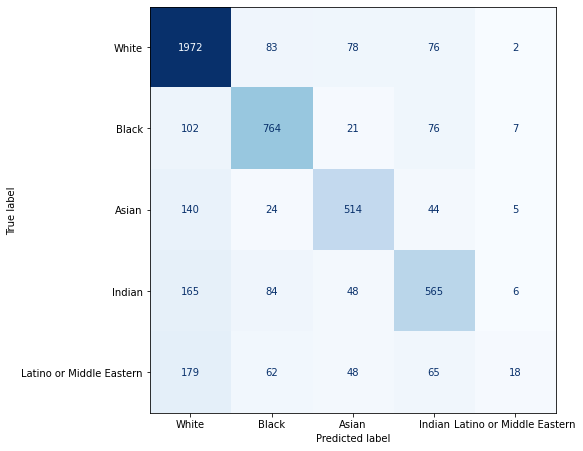

In [106]:
labels=['White', 'Black', 'Asian', 'Indian', 'Latino or Middle Eastern']
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
def plt_conf_matrix(y_true,y_pred,labels):
    print(y_pred.shape,y_true.shape, (y_pred==y_true).mean())

    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(IC, y_pred,y_true,display_labels=labels,cmap=plt.cm.Blues,ax=ax,colorbar=False,values_format='d') #,normalize='true'
    plt.tight_layout()
    plt.show()
plt_conf_matrix(y_test_ethnicity,pred_labels,labels)


In [126]:
if False:
    classifier_weights=model.classifier.weight.cpu().data.numpy()
    classifier_bias=model.classifier.bias.cpu().data.numpy()
else:
    classifier_weights=model.fc.weight.cpu().data.numpy()
    classifier_bias=model.fc.bias.cpu().data.numpy()
print(classifier_bias.shape,classifier_weights.shape)

(98,) (98, 512)


In [127]:
weights_age_agender_ethnicity=np.concatenate((classifier_weights,classifier.coef_),axis=0)
bias_age_agender_ethnicity=np.concatenate((classifier_bias,classifier.intercept_),axis=0)
print(weights_age_agender_ethnicity.shape,bias_age_agender_ethnicity.shape)

(103, 512) (103,)


In [128]:
with torch.no_grad():
    l0=nn.Linear(weights_age_agender_ethnicity.shape[1],weights_age_agender_ethnicity.shape[0])
    l0.weight.copy_(torch.from_numpy(weights_age_agender_ethnicity).float())
    l0.bias.copy_(torch.from_numpy(bias_age_agender_ethnicity).float())

In [129]:
if False:
    model.classifier=l0
else:
    model.fc=l0
model.to(device)
model.eval()

Sequential(
  (features): MobileFaceNet(
    (layers): ModuleList(
      (0): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (1): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (2): DepthWise(
        (layers): Sequential(
          (0): ConvBlock(
            (layers): Sequential(
              (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): PReLU(

In [130]:
print(test_transforms)

gender_test,age_test,ethnicity_test,y_scores_test=[],[],[],[]
imgs=[]
for filename in tqdm(files):
    fields=filename.split('_')
    real_age,real_is_female=int(fields[0]),int(fields[1])
    gender_test.append(real_is_female)
    age_test.append(real_age)
    if len(fields)>3:
        real_ethnicity=int(fields[2])
    else:
        real_ethnicity=-1
    ethnicity_test.append(real_ethnicity)
    
    filepath=os.path.join(IMAGES_DIR,filename)
    img = Image.open(filepath)
    img_tensor = test_transforms(img)
    imgs.append(img_tensor)
    if len(imgs)>=64:
        scores =  model(torch.stack(imgs, dim=0).to(device))
        scores=scores.data.cpu().numpy()
        #print(scores.shape)
        if len(y_scores_test)==0:
            y_scores_test=scores
        else:
            y_scores_test=np.concatenate((y_scores_test,scores),axis=0)

        imgs=[]

if len(imgs)>0:
    scores = model(torch.stack(imgs, dim=0).to(device))
    scores=scores.data.cpu().numpy()
    #print(scores.shape,feat.shape)
    if len(y_scores_test)==0:
        y_scores_test=scores
    else:
        y_scores_test=np.concatenate((y_scores_test,scores),axis=0)

    #imgs=[]
gender_test=np.array(gender_test)
age_test=np.array(age_test)
ethnicity_test=np.array(ethnicity_test)
print(y_scores_test.shape,gender_test.shape,age_test.shape,y_scores_test.shape)

Compose(
    Resize(size=(112, 112), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


  0%|          | 0/4811 [00:00<?, ?it/s]

(4811, 103) (4811,) (4811,) (4811, 103)


In [131]:
gender_probabs=y_scores_test[:,num_classes:num_classes+2]#.argmax(dim=1)
print('Gender acc:',np.mean(gender_probabs.argmax(axis=1)==gender_test))

age_probabs=y_scores_test[:,:num_classes]#
age_preds=age_probabs.argmax(axis=1)
print('Age acc:',np.mean(age_preds==age_test), 'mae:',np.mean(np.abs(age_preds-age_test)))

#Gender acc: 0.9465807524423197
#Age acc: 0.09353564747453752 mae: 5.528164622739555


Gender acc: 0.9451257534816047
Age acc: 0.10143421326127625 mae: 5.18374558303887


In [132]:
ethnicity_probabs=y_scores_test[:,num_classes+2:]
pred_labels=np.argmax(ethnicity_probabs,axis=-1)
print(pred_labels.shape)

y_test_ethnicity=ethnicity_test[ethnicity_test!=-1]
pred_labels=pred_labels[ethnicity_test!=-1]
print('recall (macro):',recall_score(y_test_ethnicity,pred_labels,average='macro'),'recall (micro):',recall_score(y_test_ethnicity,pred_labels,average='micro'),' acc:',accuracy_score(y_test_ethnicity,pred_labels))


(4811,)
recall (macro): 0.6586314285889355 recall (micro): 0.7397089397089397  acc: 0.7397089397089397


(4810,) (4810,) 0.7397089397089397


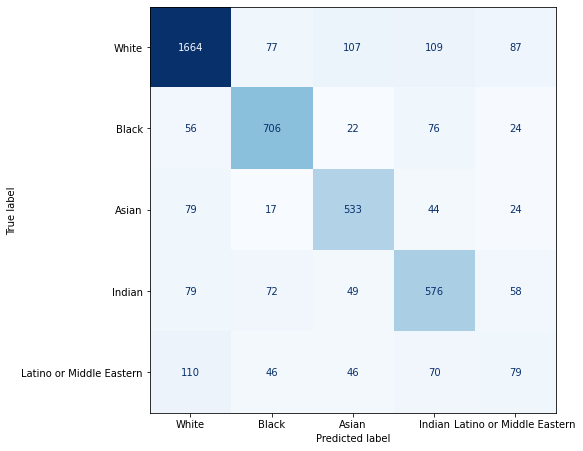

In [133]:
labels=['White', 'Black', 'Asian', 'Indian', 'Latino or Middle Eastern']
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
def plt_conf_matrix(y_true,y_pred,labels):
    print(y_pred.shape,y_true.shape, (y_pred==y_true).mean())

    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(IC, y_pred,y_true,display_labels=labels,cmap=plt.cm.Blues,ax=ax,colorbar=False,values_format='d') #,normalize='true'
    plt.tight_layout()
    plt.show()
plt_conf_matrix(y_test_ethnicity,pred_labels,labels)


In [134]:
#model_name='age_gender_ethnicity_lagenda_enet0_ft'
model_name='age_gender_ethnicity_lagenda_mbf_ft'
model_path='models/'+model_name+'.pt'
print(model_name,model_path)
if True:
    torch.save(model, model_path)
else:
    model = torch.load(model_path)
    num_classes=96
    
model.eval()

age_gender_ethnicity_lagenda_mbf_ft weights/age_gender_ethnicity_lagenda_mbf_ft.h5


Sequential(
  (features): MobileFaceNet(
    (layers): ModuleList(
      (0): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (1): ConvBlock(
        (layers): Sequential(
          (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=128)
        )
      )
      (2): DepthWise(
        (layers): Sequential(
          (0): ConvBlock(
            (layers): Sequential(
              (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): PReLU(

# Real photos

In [5]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'

#Do not forget to run pip install facenet-pytorch
from facenet_pytorch import MTCNN
mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)

def detect_face(frame):
    bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
    bounding_boxes=bounding_boxes[probs>0.9]
    return bounding_boxes

print(use_cuda)

True


2


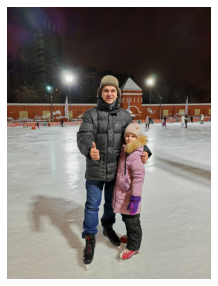

In [13]:
fpath='photo1.jpg'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)
print(len(bounding_boxes))

### ONNX 

In [137]:
#IMG_SIZE=112
dummy_input = torch.randn(1, 3, IMG_SIZE, IMG_SIZE)
model=model.cpu()
torch_out=model(dummy_input)
torch.onnx.export(model, dummy_input, 'models/'+model_name+'.onnx', opset_version=11,do_constant_folding=True,export_params=True,input_names=['input'],output_names=['output'],dynamic_axes={'input':{0:'batch_size'},'output':{0:'batch_size'}})

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [16]:
from facial_attribute_recognizer import FacialAttributeRecognizer
model_name='age_gender_ethnicity_lagenda_enet0_ft'
#model_name='age_gender_ethnicity_lagenda_mbf_ft'
attrRec=FacialAttributeRecognizer(model_name=model_name)

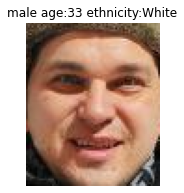

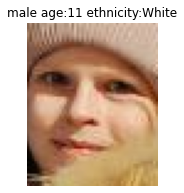

In [17]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    age_pred,isMale,ethnicity=attrRec.predict_attributes(face_img, estimage_age=False)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(('male' if isMale else 'female')+' age:'+str(age_pred)+' ethnicity:'+ethnicity)

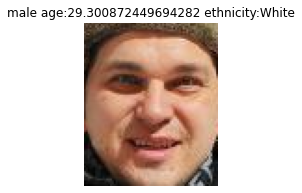

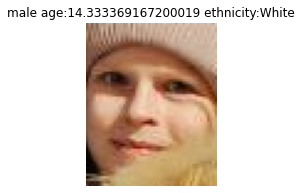

In [18]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    age_pred,isMale,ethnicity=attrRec.predict_attributes(face_img, estimage_age=True)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(('male' if isMale else 'female')+' age:'+str(age_pred)+' ethnicity:'+ethnicity)